In [28]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

from patsy import dmatrices

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dat = pd.read_csv('../Data/statsData/Guerry.csv')

results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.90e-08
Time:                        11:37:08   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [3]:
# Generate artificial data (2 regressors + constant)
nobs = 100

X = np.random.random((nobs, 2))

X = sm.add_constant(X)

beta = [1, .1, .5]

e = np.random.random(nobs)

y = np.dot(X, beta) + e

# Fit regression model
results = sm.OLS(y, X).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     6.669
Date:                Fri, 05 Mar 2021   Prob (F-statistic):            0.00193
Time:                        11:37:08   Log-Likelihood:                -16.795
No. Observations:                 100   AIC:                             39.59
Df Residuals:                      97   BIC:                             47.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6049      0.077     20.863      0.0

In [4]:
dat.head()

,Unnamed: 0,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,1,E,Ain,28870,15890,37,5098,33120,35039,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,2,N,Aisne,26226,5521,51,8901,14572,12831,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,3,C,Allier,26747,7925,13,10973,17044,114121,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [5]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       86 non-null     int64  
 1   dept             86 non-null     int64  
 2   Region           85 non-null     object 
 3   Department       86 non-null     object 
 4   Crime_pers       86 non-null     int64  
 5   Crime_prop       86 non-null     int64  
 6   Literacy         86 non-null     int64  
 7   Donations        86 non-null     int64  
 8   Infants          86 non-null     int64  
 9   Suicides         86 non-null     int64  
 10  MainCity         86 non-null     object 
 11  Wealth           86 non-null     int64  
 12  Commerce         86 non-null     int64  
 13  Clergy           86 non-null     int64  
 14  Crime_parents    86 non-null     int64  
 15  Infanticide      86 non-null     int64  
 16  Donation_clergy  86 non-null     int64  
 17  Lottery          8

In [6]:
dat = dat.dropna()
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       85 non-null     int64  
 1   dept             85 non-null     int64  
 2   Region           85 non-null     object 
 3   Department       85 non-null     object 
 4   Crime_pers       85 non-null     int64  
 5   Crime_prop       85 non-null     int64  
 6   Literacy         85 non-null     int64  
 7   Donations        85 non-null     int64  
 8   Infants          85 non-null     int64  
 9   Suicides         85 non-null     int64  
 10  MainCity         85 non-null     object 
 11  Wealth           85 non-null     int64  
 12  Commerce         85 non-null     int64  
 13  Clergy           85 non-null     int64  
 14  Crime_parents    85 non-null     int64  
 15  Infanticide      85 non-null     int64  
 16  Donation_clergy  85 non-null     int64  
 17  Lottery          8

In [7]:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=dat, return_type='dataframe')
y[:3]

,Lottery
0,41.0
1,38.0
2,66.0


In [8]:
X[:3]

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0


In [9]:
mod = sm.OLS(y,X)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.07e-05
Time:                        11:37:08   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      0.000      19.826      57.478
Region[T.E]   -15.4278      9.727     -1.586      0.117     -34.793       3.938
Region[T.N]   -10.0170      9.260     -1.082      0.283     -28.453       8.419
Region[T.S]    -4.5483      7.279     -0.625      0.534     -19.039       9.943
Region[T.W]   -10.0913      7.196     -1.402      0.165     -24.418       4.235
Literacy       -0.1858      0.210     -0.886      0.378      -0.603       0.232
Wealth          0.4515      0.103      4.390      0.000       0.247       0.656
==============================================================================
Omnibus:                        3.049   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.694
Skew:                          -0.340   Prob(JB):                        0.260
Kurtosis:                       2.454   Cond. No.                         371.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
res.params


Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

In [11]:
sm.stats.linear_rainbow(res)

(0.8472339976156913, 0.6997965543621643)

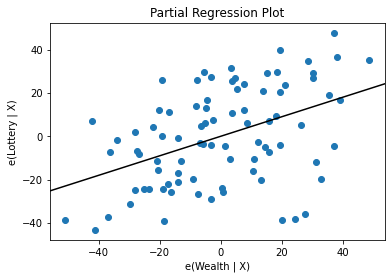

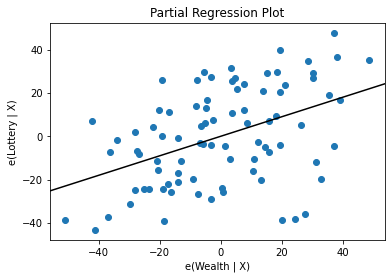

In [12]:
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'], data=dat, obs_labels=False)

In [13]:
res.rsquared


0.337950869192882

In [14]:
res.tvalues

Intercept      4.087379
Region[T.E]   -1.586030
Region[T.N]   -1.081713
Region[T.S]   -0.624857
Region[T.W]   -1.402324
Literacy      -0.885712
Wealth         4.389851
dtype: float64

In [15]:
# 构造变量
number=20
x=np.linspace(0,10,number) #x值
X=sm.add_constant(x) #回归方程添加一列x0=1
bata=np.array([2,5]) #系数
e=np.random.normal(size=number) #误差
y=np.dot(X,bata)+e #观察值y

In [16]:
# 建回归方程
#OLS（endog,exog=None,missing='none',hasconst=None) (endog:因变量，exog=自变量）
modle=sm.OLS(y,X) #最小二乘法
res=modle.fit() #拟合数据
Bata=res.params  #取系数
res.summary() #结果

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.073e+04
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.92e-26
Time:                        11:37:09   Log-Likelihood:                -18.786
No. Observations:                  20   AIC:                             41.57
Df Residuals:                      18   BIC:                             43.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2571      0.281      8.027      0.000       1.666       2.848
x1             4.9797      0.048    103.583      0.000       4.879       5.081
==============================================================================
Omnibus:                        7.641   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                5.001
Skew:                           1.009   Prob(JB):                       0.0820
Kurtosis:                       4.389   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

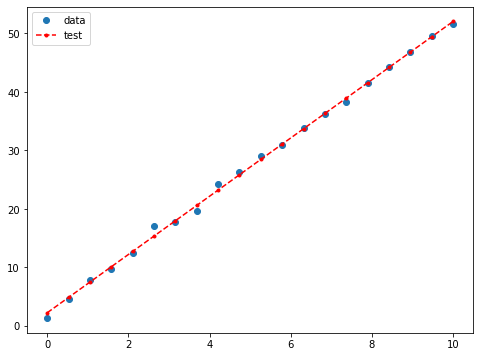

In [17]:
import matplotlib.pyplot as plt
#作图
Y=res.fittedvalues  #预测值
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')#原始数据
ax.plot(x, Y, 'r--.',label='test')#拟合数据
ax.legend(loc='best') #展示各点表示意思，即label
plt.show()

[4.90954238 2.14232163 2.98156738]


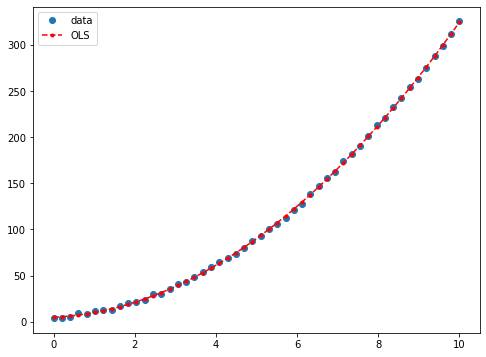

In [18]:
#构造变量
number=50
x=np.linspace(0,10,number)
X=np.column_stack((x,x**2))  #!!!
X=sm.add_constant(X)
bata=np.array([5,2,3])
e=np.random.normal(size=number)
y=np.dot(X,bata)+e

#建立方程
model=sm.OLS(y,X)
res=model.fit()
Bata=res.params
print(Bata)
res.summary()

#作图
y_=res.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_, 'r--.',label='OLS')
ax.legend(loc='best')
plt.show()

In [19]:

#构造函数
number=50
group=np.zeros(number,int)
group[20:40]=1
group[40:]=2
category=sm.categorical(group,drop=True) #构造分类变量
x=np.linspace(0,10,number)
X=np.column_stack((x,category))
X=sm.add_constant(X)
bata=np.array([2,3,4,5,6])
e=np.random.normal(size=number)
y=np.dot(X,bata)+e

#建立方程
model=sm.OLS(y,X).fit()
model.summary()

D:\pythonProject\envs\pythonProject\lib\site-packages\statsmodels\tools\tools.py:158: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1320.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.32e-44
Time:                        11:37:10   Log-Likelihood:                -72.110
No. Observations:                  50   AIC:                             152.2
Df Residuals:                      46   BIC:                             159.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6063      0.605      7.619      0.000       3.389       5.823
x1             3.1593      0.139     22.708      0.000       2.879       3.439
x2             1.3166      0.383      3.434      0.001       0.545       2.088
x3             1.2614      0.320      3.937      0.000       0.616       1.906
x4             2.0284      0.722      2.810      0.007       0.575       3.481
==============================================================================
Omnibus:                        1.646   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.225
Skew:                           0.383   Prob(JB):                        0.542
Kurtosis:                       3.011   Cond. No.                     6.46e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.16e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

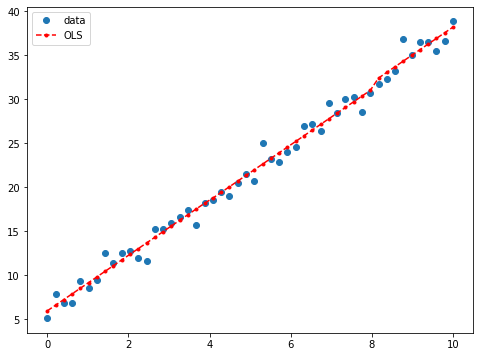

In [20]:
#作图
Y=model.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, Y, 'r--.',label='OLS')
ax.legend(loc='best')
plt.show()


In [21]:
moore = pd.read_csv('../Data/statsData/Moore.csv')
data = moore.rename(columns={"partner.status": "partner_status"})
moore_lm = smf.ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)',data=data).fit()
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame
table

,sum_sq,df,F,PR(>F)
"C(fcategory, Sum)",11.614700,2.0,0.276958,0.759564
"C(partner_status, Sum)",212.213778,1.0,10.120692,0.002874
"C(fcategory, Sum):C(partner_status, Sum)",175.488928,2.0,4.184623,0.022572
Residual,817.763961,39.0,NaN,NaN


In [22]:
data = pd.DataFrame([[1, 1, 32],
                     [1, 2, 35],
                     [1, 3, 35.5],
                     [1, 4, 38.5],
                     [2, 1, 33.5],
                     [2, 2, 36.5],
                     [2, 3, 38],
                     [2, 4, 39.5],
                     [3, 1, 36],
                     [3, 2, 37.5],
                     [3, 3, 39.5],
                     [3, 4, 43]],
                    columns=['A', 'B', 'value'])

# 因素A的水平对结果的影响
'value ~ C(A)'

# 因素A和因素B的水平对结果的影响
'value ~ C(A) + C(B)'

# 因素A和因素B以及A和B的交互作用的水平对结果的影响
'value ~ C(A) + C(B) + C(A)*C(B)'

# 多因素无重复试验，不计算交互作用的影响
model = smf.ols('value~C(A) + C(B)', data=data[['A', 'B', 'value']]).fit()
anovat = sm.stats.anova_lm(model)
anovat

,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,28.291667,14.145833,35.736842,0.000465
C(B),3.0,66.062500,22.020833,55.631579,0.000090
Residual,6.0,2.375000,0.395833,NaN,NaN


In [23]:
model.summary()

D:\pythonProject\envs\pythonProject\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     47.67
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           9.45e-05
Time:                        11:37:10   Log-Likelihood:                -7.3078
No. Observations:                  12   AIC:                             26.62
Df Residuals:                       6   BIC:                             29.53
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.0417      0.445     72.023      0.000      30.953      33.130
C(A)[T.2]      1.6250      0.445      3.653      0.011       0.536       2.714
C(A)[T.3]      3.7500      0.445      8.429      0.000       2.661       4.839
C(B)[T.2]      2.5000      0.514      4.867      0.003       1.243       3.757
C(B)[T.3]      3.8333      0.514      7.462      0.000       2.576       5.090
C(B)[T.4]      6.5000      0.514     12.653      0.000       5.243       7.757
==============================================================================
Omnibus:                        0.415   Durbin-Watson:                   2.364
Prob(Omnibus):                  0.813   Jarque-Bera (JB):                0.506
Skew:                          -0.217   Prob(JB):                        0.777
Kurtosis:                       2.093   Cond. No.                         5.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
df = pd.read_csv('../Data/statsData/testData.csv')
df_melt = pd.melt(df.reset_index(),id_vars=['index'],value_vars=['A','B','C','D'])
df_melt.columns = ['index', 'treatments', 'value']
df_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


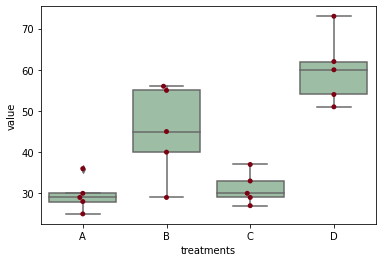

In [31]:
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [32]:
import scipy.stats as stats

fvalue, pvalue = stats.f_oneway(df['A'],df['B'],df['C'],df['D'])
print(fvalue, pvalue)

17.492810457516338 2.639241146210922e-05


In [34]:
model = smf.ols('value ~ C(treatments)',data = df_melt).fit()
anova_table = sm.stats.anova_lm(model,typ = 2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [38]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


In [39]:
res.tukey_hsd(df=df_melt,res_var='value',xfac_var='treatments',anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,15.4,1.692871,29.107129,4.546156,0.025070
1,A,C,1.6,-12.107129,15.307129,0.472328,0.900000
2,A,D,30.4,16.692871,44.107129,8.974231,0.001000
3,B,C,13.8,0.092871,27.507129,4.073828,0.048178
4,B,D,15.0,1.292871,28.707129,4.428074,0.029578
5,C,D,28.8,15.092871,42.507129,8.501903,0.001000


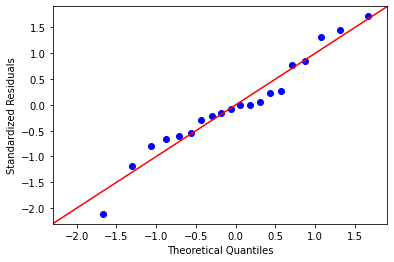

In [40]:
sm.qqplot(res.anova_std_residuals,line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

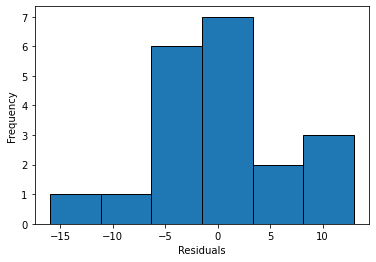

In [42]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [43]:
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.9685019850730896 0.7229772806167603


In [44]:
w, pvalue = stats.bartlett(df['A'],df['B'],df['C'],df['D'])
print(w, pvalue)

5.687843565012841 0.1278253399753447


In [45]:
res.bartlett(df=df_melt,res_var='value',xfac_var='treatments')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),5.6878
1,Degrees of freedom (Df),3.0000
2,p value,0.1278


In [46]:
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),1.9220
1,Degrees of freedom (Df),3.0000
2,p value,0.1667


In [47]:
d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt", sep="\t")
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
d_melt.columns = ['Genotype', 'years', 'value']
d_melt.head()

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94


<AxesSubplot:xlabel='Genotype', ylabel='value'>

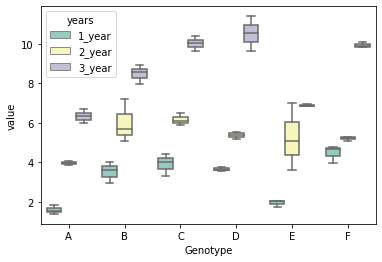

In [48]:
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set3")

In [49]:
model = smf.ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


In [50]:
res = stat()
res.anova_stat(df=d_melt, res_var='value', anova_model='value~C(Genotype)+C(years)+C(Genotype):C(years)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Genotype),5.0,58.551733,11.710347,32.748581,1.931655e-12
C(years),2.0,278.925633,139.462817,390.014868,4.006243e-25
C(Genotype):C(years),10.0,17.122967,1.712297,4.788525,2.230094e-04
Residual,36.0,12.873000,0.357583,NaN,NaN


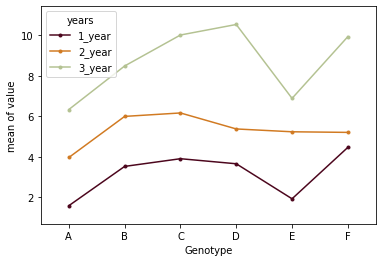

In [52]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(x=d_melt['Genotype'], trace=d_melt['years'], response=d_melt['value'],
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()